# CV Basics 

1) Load & view images
2) Convert to grayscale + show histogram + simple contrast stretch
3) Basic Sobel edge detection (pure NumPy)

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Provide image paths (already included in this notebook)
IMAGE_PATHS = []  # filled in next cell

In [2]:
IMAGE_PATHS = ['cv_pic_shapes.png','cv_pic_landscape.png','cv_pic_checker_noise.png']

In [3]:
def show(img, title=None, cmap=None, figsize=(5,4)):
    if isinstance(img, Image.Image):
        arr = np.asarray(img).astype(np.float32) / 255.0
    else:
        arr = img
    plt.figure(figsize=figsize)
    if arr.ndim == 2:
        plt.imshow(arr, cmap=cmap or 'gray')
    else:
        plt.imshow(arr)
    if title: plt.title(title)
    plt.axis('off'); plt.tight_layout(); plt.show()

def rgb_to_gray(img_rgb):
    arr = np.asarray(img_rgb).astype(np.float32)
    gray = 0.299*arr[:,:,0] + 0.587*arr[:,:,1] + 0.114*arr[:,:,2]
    return gray / 255.0

def convolve2d(img, kernel):
    k = np.array(kernel, dtype=np.float32)
    kh, kw = k.shape
    pad_h, pad_w = kh//2, kw//2
    padded = np.pad(img, ((pad_h,pad_h),(pad_w,pad_w)), mode='reflect')
    out = np.zeros_like(img, dtype=np.float32)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i,j] = np.sum(padded[i:i+kh, j:j+kw] * k)
    return out

## 1) Load & view images

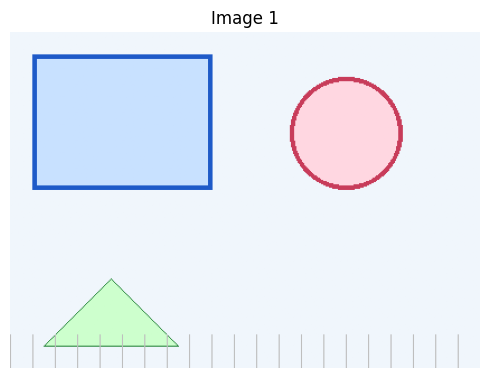

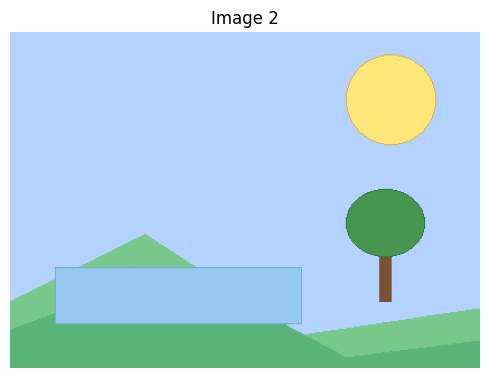

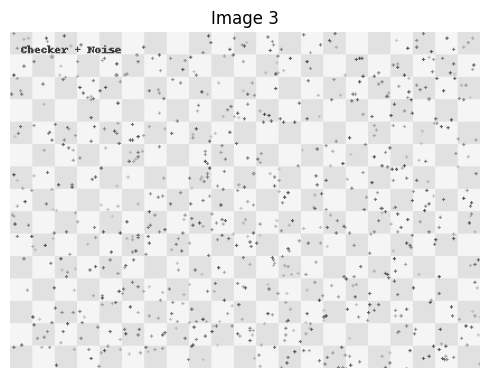

In [4]:
images = [Image.open(p).convert('RGB') for p in IMAGE_PATHS]
for i, im in enumerate(images, 1):
    show(im, f"Image {i}")

## 2) Grayscale, histogram & contrast stretching

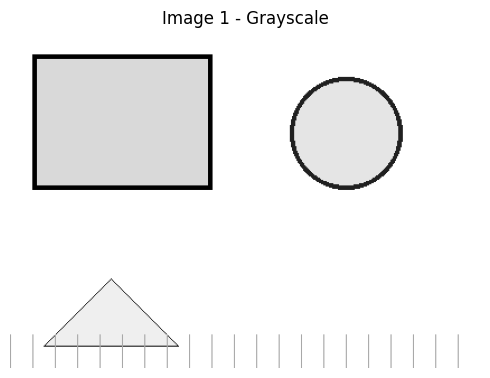

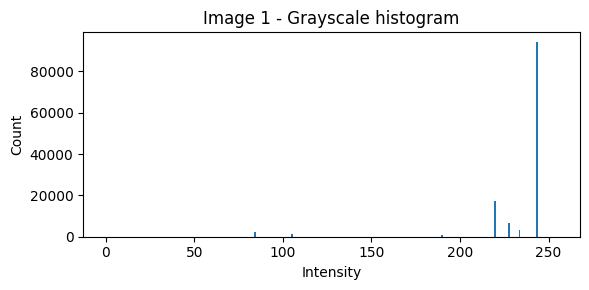

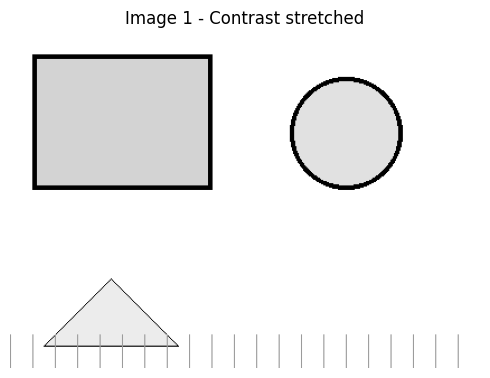

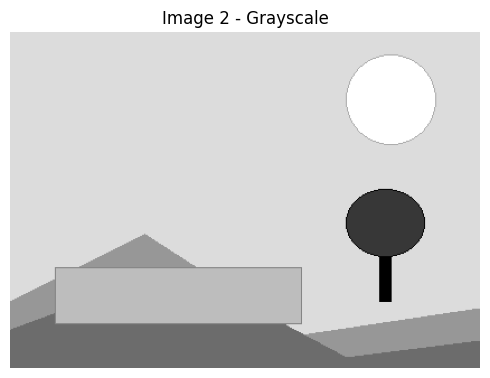

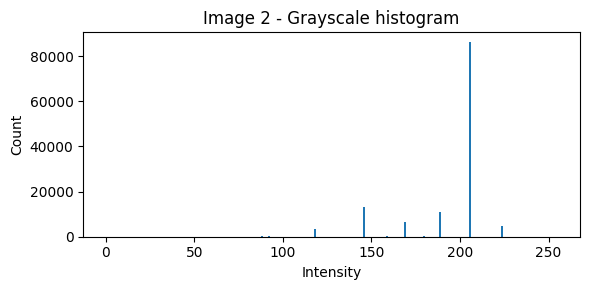

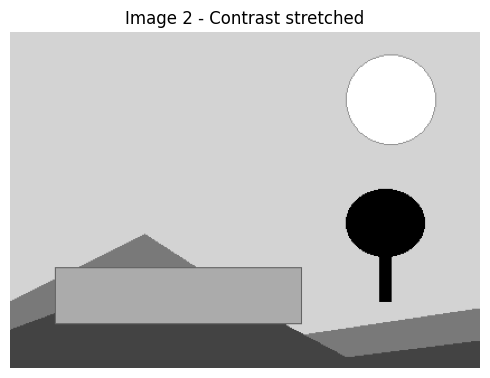

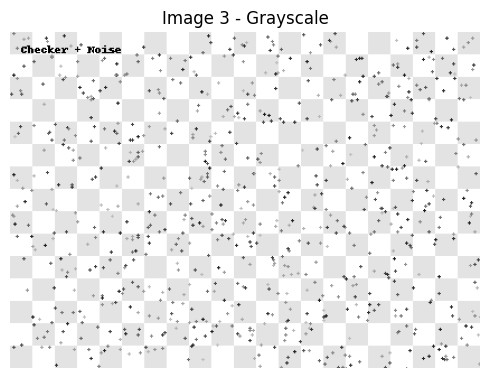

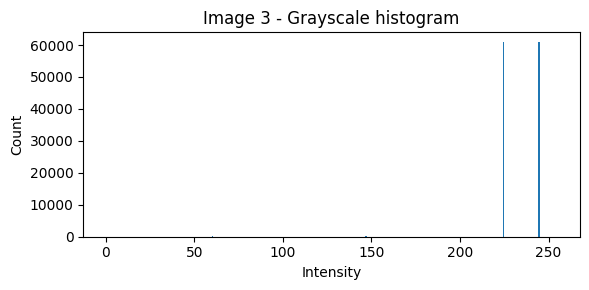

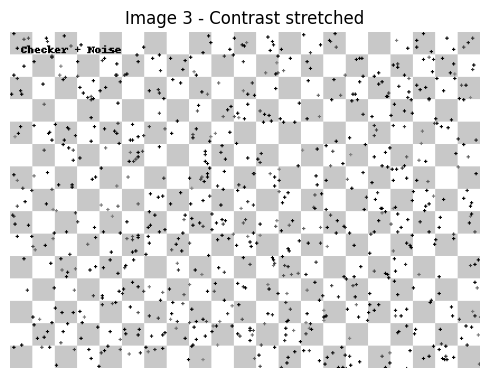

In [5]:
grays = [rgb_to_gray(im) for im in images]

for i, g in enumerate(grays, 1):
    show(g, f"Image {i} - Grayscale", cmap='gray')
    plt.figure(figsize=(6,3))
    plt.hist((g*255).astype(np.uint8).ravel(), bins=256, range=(0,255))
    plt.title(f"Image {i} - Grayscale histogram")
    plt.xlabel("Intensity"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    low, high = np.percentile(g, [2, 98])
    stretched = np.clip((g - low) / (high - low + 1e-8), 0, 1)
    show(stretched, f"Image {i} - Contrast stretched", cmap='gray')

## 3) Edge detection (Sobel)

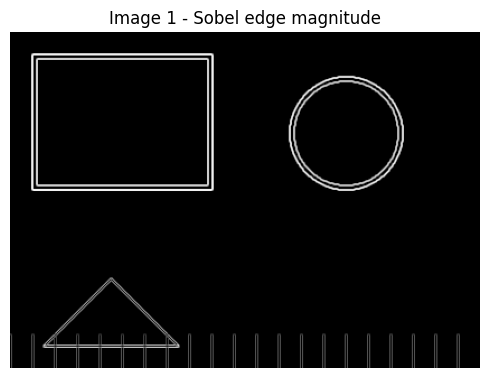

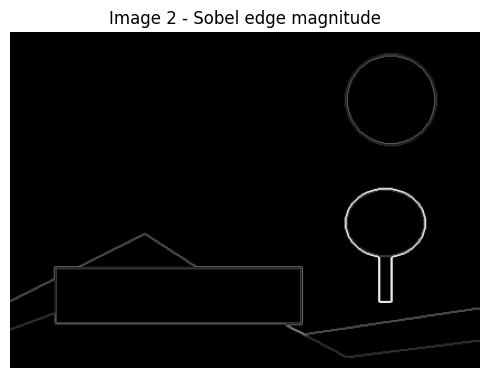

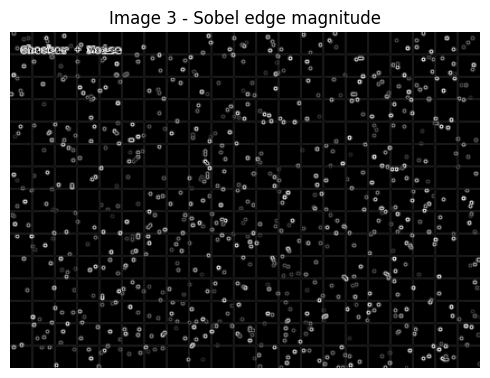

In [6]:
Kx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]
Ky = [[-1,-2,-1],
      [ 0, 0, 0],
      [ 1, 2, 1]]

for i, g in enumerate(grays, 1):
    gx = convolve2d(g, Kx)
    gy = convolve2d(g, Ky)
    edges = np.sqrt(gx**2 + gy**2)
    edges /= edges.max() + 1e-8
    show(edges, f"Image {i} - Sobel edge magnitude", cmap='gray')